# `tf.keras.layers`

In [1]:
import tensorflow as tf

### `tf.keras.layers.Dense`
**Dense** : 신경망 구조의 가장 기본적 형태<br>
$y=f(Wx+b)$ 수식을 만족하는 기본적인 신경망 형태의 층을 만드는 함수 (은닉층이 없는 간단한 신경망 형태)
- $x$ : 입력 벡터
- $b$ : 편향 벡터
- $W$ : 가중치 행렬
- $f$ : 활성화 함수

In [2]:
# W, b 각각 변수로 선언
W = tf.Variable(tf.random.uniform([5,10], -1.0, 1.0)) 
# tf.random.uniform: outputs random values from a uniform distribution
# tf.random.uniform(shape, minval=0, maxval=None, dtype = tf.dtypes.float32, seed = None, name=None)

b = tf.Variable(tf.zeros([10]))
x = tf.Variable(tf.random.uniform([10,1], 1.0, 3.0))
# tensorflow의 shape는 pandas/numpy에서랑 다른가..

# 행렬 곱으로 Dense층 구하기
y = tf.matmul(W,x) + b #x는 입력 벡터
y

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[ 3.2667973,  3.2667973,  3.2667973,  3.2667973,  3.2667973,
         3.2667973,  3.2667973,  3.2667973,  3.2667973,  3.2667973],
       [ 9.115784 ,  9.115784 ,  9.115784 ,  9.115784 ,  9.115784 ,
         9.115784 ,  9.115784 ,  9.115784 ,  9.115784 ,  9.115784 ],
       [-4.6147194, -4.6147194, -4.6147194, -4.6147194, -4.6147194,
        -4.6147194, -4.6147194, -4.6147194, -4.6147194, -4.6147194],
       [ 2.7773156,  2.7773156,  2.7773156,  2.7773156,  2.7773156,
         2.7773156,  2.7773156,  2.7773156,  2.7773156,  2.7773156],
       [-5.0511527, -5.0511527, -5.0511527, -5.0511527, -5.0511527,
        -5.0511527, -5.0511527, -5.0511527, -5.0511527, -5.0511527]],
      dtype=float32)>

위의 과정을 직접하지 않고 `Dense`를 이용해 한 줄의 코드로 작성할 수 있음.<br>
Dense 사용을 위해 우선 객체 생성

In [3]:
# Dense 객체 생성
dense = tf.keras.layers.Dense(...)

# dense 객체를 만들기 위해서는 입력값 필요. 객체 생성 시 함께 넣거나 / 생성 후 따로 적용
# 1. 객체 생성 후 다시 호출하면서 입력값 설정
dense = tf.keras.layers.Dense(...)
output = dense(input)

#2. 객체 생성 시 입력값 설정
output = tf.keras.layers.Dense(...)(input)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'ellipsis'

In [ ]:
tf.keras.layers.Dense?
# units: 출력값의 크기, integer 혹은 long 형태. (positive integer, dimensionality of the output space)
# activation: activation function
# use_bias: Boolean. whether the layer uses a bias vector (편향 b를 사용할지 여부)
# kernel_initializer: 가중치(W) 초기화 함수. Initializer for the 'kernel' weights matrix
# bias_initializer: 편향 초기화 함수
# kernal_regularizer: 가중치 정규화 방법
# bias_regularizer: 편향 정규화 방법
# activity_regularizer: 출력값 정규화 방법
# kernel_constraint: optimizer에 의해 업데이트된 이후에 가중치에 적용되는 부가적 제약 함수 (ex. norm constrain, value constraint)
#                    Constraint function applied to the 'kernel' weights matrix
# bias_constraint: optimizer에 의해 업데이트된 이후에 편향에 적용되는 부가적 제약 함수 (ex. 위와 같음)
#                  Constraint function applied to the bias vector


In [5]:
INPUT_SIZE = (20, 1)
CONV_INPUT_SIZE = (1, 28, 28)
IS_TRAINING = True

### Dense Layer
입력값에 대해 활성화 함수로 시그모이드 함수로 사용,<br>
출력값으로 10개의 값을 출력하는 **완전연결계층(Fully Connected Layer)**

In [6]:
inputs = tf.keras.layers.Input(shape = INPUT_SIZE) # random으로 input 생성해주나?
output = tf.keras.layers.Dense(units = 10, activation = tf.nn.sigmoid)(inputs)

In [7]:
tf.keras.layers.Input?

### Dense Layer with 1 hidden layer
10개의 노드를 가지는 은닉층 + 2개의 노드를 가진 최종 출력 값 신경망 구조

In [ ]:
inputs = tf.keras.layers.Input(shape = INPUT_SIZE)
hidden = tf.keras.layers.Dense(units = 10, activation = tf.nn.sigmoid)(inputs)
output = tf.keras.layers.Dense(units = 2, activation = tf.nn.sigmoid)(hidden)

---
### `tf.keras.layers.Dropout`
과적합을 해결하기 위한 정규화 방법 중 하나<br>
사용법은, Dropout 객체 사용

학습 데이터에 과적합되는 상황을 방지하기 위해, 학습 시 특정 확률로 노드들의 값을 0으로 만듦. <br>
이 과정은 학습 시에만 적용되고 예측/테스트 시에는 적용되지 않아야 함!<br>
-> 이걸 keras Dropout이 자동으로 적용해줌

### Dropout

In [ ]:
inputs = tf.keras.layers.Input(shape = INPUT_SIZE)
dropout = tf.keras.layers.Dropout(rate=0.5)(inputs) # 50%를 0으로 만듦

### Dense Layer with 1 hidden layer and dropout

In [ ]:
inputs = tf.keras.layers.Input(shape = INPUT_SIZE)
dropout = tf.keras.layers.Dropout(rate = 0.2)(inputs)
hidden = tf.keras.layers.Dense(units = 10, activation = tf.nn.sigmoid)(dropout)
output = tf.keras.layers.Dense(units = 2, activation = tf.nn.sigmoid)(hidden)

---
### `tf.keras.layers.Conv1D`
텐서플로우의 합성곱 연산은 Conv1D, 2D, 3D로 나뉨.<br>
기본적인 이미지에 적용하는 합성곱 방식은 Conv2D. 자연어처리에서는 각 단어(문자) 벡터의 차원 전체에 대해 필터를 적용시키기 위해 주로 Conv1D 사용.

### Convolutional layer
간단하게 Conv1D를 사용한 합성곱 신경망 만들기

In [ ]:
inputs = tf.keras.layers.Input(shape = INPUT_SIZE) # 왜 CONV_INPUT_SIZE를 넣으면 error?
conv = tf.keras.layers.Conv1D(
filters = 10,
kernel_size = 3,
padding = 'same',
activation = tf.nn.relu)(inputs)

### Convolutional layer with dropout
입력값에 드롭아웃 적용한 합성곱 신경망

In [ ]:
inputs = tf.keras.layers.Input(shape = INPUT_SIZE)
dropout = tf.keras.layers.Dropout(rate = 0.2)(inputs)
conv = tf.keras.layers.Conv1D(
filters = 10,
kernel_size = 3,
padding = 'same',
activation = tf.nn.relu)(dropout)

---
### `tf.keras.layers.MaxPool1D`
합성곱 신경망과 함께 쓰이는 기법 중 하나, 풀링.<br>
보통 피처맵의 크기를 줄이거나 주요 특징을 뽑아내기 위해 합성곱 이후에 적용되는 기법.<br>

주로 두 가지 풀링 기법
- 맥스 풀링(max-pooling) : 피처 맵에 대해 최댓값만을 뽑아내는 방식
- 평균 풀링(average-pooling) : 피처 맵에 대해 전체 값들을 평균한 값을 뽑는 방식

(이 책에서는 주로 맥스 풀링 기법 사용)<br>
max pooling은 합성곱과 같이 세 가지 형태로 모델이 구분돼 있다. : MaxPool1D, MaxPool2D, MaxPool3D (합성곱과 같은 원리)<br>
자연어처리에서는 주로 MaxPool1D를 사용하는데, 한 방향으로만 풀링 진행. 사용법은 앞서 설명한 합성곱과 동일

In [ ]:
# 입력값이 -> 합성곱과 맥스 풀링을 사용한 후 -> 완전 연결 계층을 통해 -> 최종 출력값이 나오눈 구조를 만들어보자. 
# 입력값에는 드롭아웃 적용, 맥스 풀링 결괏값을 완전 연결 계층으로 연결하기 위해서는 행렬이었던 것을 벡터로 만들어야 함.(flatten)
inputs = tf.keras.layers.Input(shape = INPUT_SIZE) # 입력값
dropout = tf.keras.layers.Dropout(rate = 0.2)(inputs) # 입력값에 dropout 적용
conv = tf.keras.layers.Conv1D(
filters = 10,
kernel_size = 3,
padding = 'same',
activation = tf.nn.relu)(dropout) # dropout 한 입력값으로 합성곱
max_pool = tf.keras.layers.MaxPool1D(pool_size = 3, padding = 'same')(conv) # 맥스풀링
flatten = tf.keras.layers.Flatten()(max_pool) # 맥스 풀링 결괏값을 flatten (행렬 -> 벡터)
hidden = tf.keras.layers.Dense(units = 50, activation = tf.nn.relu)(flatten) # 은닉층(완전연결계층)
output = tf.keras.layers.Dense(units = 10, activation = tf.nn.softmax)(hidden) # 왜 여기선 활성화함수가 또 softmax여?


---

# tensorflow2

In [8]:
import tensorflow as tf
from tensorflow.keras import preprocessing
import numpy as np

In [9]:
samples = ['너 오늘 이뻐 보인다',
         '나는 오늘 기분이 더러워',
         '끝내주는데, 좋은 일이 있나봐',
         '나 좋은 일이 생겼어',
         '아 오늘 진짜 짜증나',
         '환상적인데, 정말 좋은거 같아']
targets = [[1],[0],[1],[1],[0],[1]] # labels

In [10]:
# 주로 다음과 같은 구조로 전처리! (4,5,6장에 자세히 나온다고 함)
tokenizer = preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples) # sequences: list의 list
input_sequences = np.array(sequences)
labels = np.array(targets)

word_index = tokenizer.word_index # 자주 등장한 token이 1번 쪽으로 가는군
word_index

{'오늘': 1,
 '좋은': 2,
 '일이': 3,
 '너': 4,
 '이뻐': 5,
 '보인다': 6,
 '나는': 7,
 '기분이': 8,
 '더러워': 9,
 '끝내주는데': 10,
 '있나봐': 11,
 '나': 12,
 '생겼어': 13,
 '아': 14,
 '진짜': 15,
 '짜증나': 16,
 '환상적인데': 17,
 '정말': 18,
 '좋은거': 19,
 '같아': 20}

In [11]:
from tensorflow.keras import backend
from tensorflow.keras import layers

In [12]:
batch_size = 2 # 한 번에 두개의 데이터가 불려옴
num_epochs = 100

In [13]:
vocab_size = len(word_index) + 1 # 이건 뭐지 왜! vocab size가 word 개수에 +1이 되는 걸까
emb_size = 128
hidden_dimension = 256
output_dimension = 1

### Keras Sequential
[keras의 Sequential 모델](https://www.tensorflow.org/guide/keras/sequential_model?hl=ko)

In [14]:
model = tf.keras.Sequential([
    layers.Embedding(vocab_size, emb_size, input_length = 4),
    layers.Lambda(lambda x: tf.reduce_mean(x, axis = 1)),
    layers.Dense(hidden_dimension, activation = 'relu'),
    layers.Dense(output_dimension, activation = 'sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

# 기존에 estimator로 하던 걸 keras Sequential로 하는 건가..?

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 128)            2688      
_________________________________________________________________
lambda (Lambda)              (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 35,969
Trainable params: 35,969
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(input_sequences, labels, epochs = num_epochs, batch_size = batch_size)
# input_sequences: np.array(sequences) 즉, 숫자로 바뀐 각 문장에 대한 tokenized array
# labels: 긍부정에 따라 [1], [0] 으로 각 문장에 대한 라벨을 붙였던 리스트
# num_epochs: 위에서 100으로 설정
# batch_size: 2로 위에서 설정

# 숫자화된 각 문장을 각 target 값으로 학습 시키는 것인듯??

Epoch 1/100
3/3 [==============================] - 0s 987us/step - loss: 0.6900 - accuracy: 0.6667
Epoch 2/100
3/3 [==============================] - 0s 1ms/step - loss: 0.6693 - accuracy: 0.6667
Epoch 3/100
3/3 [==============================] - 0s 1ms/step - loss: 0.6536 - accuracy: 1.0000
Epoch 4/100
3/3 [==============================] - 0s 1ms/step - loss: 0.6341 - accuracy: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 996us/step - loss: 0.6160 - accuracy: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 1ms/step - loss: 0.5925 - accuracy: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 1ms/step - loss: 0.5666 - accuracy: 1.0000
Epoch 8/100
3/3 [==============================] - 0s 1ms/step - loss: 0.5318 - accuracy: 1.0000
Epoch 9/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4978 - accuracy: 1.0000
Epoch 10/100
3/3 [==============================] - 0s 1ms/step - loss: 0.4587 - accuracy: 1.0000
Epoch 11/100
3/3 [=======

Epoch 84/100
3/3 [==============================] - 0s 2ms/step - loss: 7.9391e-04 - accuracy: 1.0000
Epoch 85/100
3/3 [==============================] - 0s 2ms/step - loss: 7.7556e-04 - accuracy: 1.0000
Epoch 86/100
3/3 [==============================] - 0s 1ms/step - loss: 7.5612e-04 - accuracy: 1.0000
Epoch 87/100
3/3 [==============================] - 0s 1ms/step - loss: 7.3984e-04 - accuracy: 1.0000
Epoch 88/100
3/3 [==============================] - 0s 1ms/step - loss: 7.1891e-04 - accuracy: 1.0000
Epoch 89/100
3/3 [==============================] - 0s 1ms/step - loss: 7.0324e-04 - accuracy: 1.0000
Epoch 90/100
3/3 [==============================] - 0s 1ms/step - loss: 6.8582e-04 - accuracy: 1.0000
Epoch 91/100
3/3 [==============================] - 0s 2ms/step - loss: 6.7052e-04 - accuracy: 1.0000
Epoch 92/100
3/3 [==============================] - 0s 1ms/step - loss: 6.5369e-04 - accuracy: 1.0000
Epoch 93/100
3/3 [==============================] - 0s 1ms/step - loss: 6.3946e-04

### Keras Functional API

In [17]:
inputs = layers.Input(shape = (4,))
embed_output = layers.Embedding(vocab_size, emb_size)(inputs) # vocab_size : 21, emb_size : 128
pooled_output = tf.reduce_mean(embed_output, axis = 1)
hidden_layer = layers.Dense(hidden_dimension, activation = 'relu')(pooled_output)
outputs = layers.Dense(output_dimension, activation = 'sigmoid')(hidden_layer)

In [18]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 4, 128)            2688      
_________________________________________________________________
tf_op_layer_Mean (TensorFlow [(None, 128)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 35,969
Trainable params: 35,969
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(input_sequences, labels, epochs = num_epochs, batch_size = batch_size)

Epoch 1/100
3/3 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.1667
Epoch 2/100
3/3 [==============================] - 0s 995us/step - loss: 0.6737 - accuracy: 1.0000
Epoch 3/100
3/3 [==============================] - 0s 1ms/step - loss: 0.6566 - accuracy: 1.0000
Epoch 4/100
3/3 [==============================] - 0s 1ms/step - loss: 0.6388 - accuracy: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 998us/step - loss: 0.6193 - accuracy: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 999us/step - loss: 0.5960 - accuracy: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 2ms/step - loss: 0.5698 - accuracy: 1.0000
Epoch 8/100
3/3 [==============================] - 0s 995us/step - loss: 0.5371 - accuracy: 1.0000
Epoch 9/100
3/3 [==============================] - 0s 996us/step - loss: 0.5022 - accuracy: 1.0000
Epoch 10/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4600 - accuracy: 1.0000
Epoch 11/100
3/3 [=

3/3 [==============================] - 0s 1ms/step - loss: 8.8403e-04 - accuracy: 1.0000
Epoch 85/100
3/3 [==============================] - 0s 1ms/step - loss: 8.6554e-04 - accuracy: 1.0000
Epoch 86/100
3/3 [==============================] - 0s 2ms/step - loss: 8.4427e-04 - accuracy: 1.0000
Epoch 87/100
3/3 [==============================] - 0s 1ms/step - loss: 8.2453e-04 - accuracy: 1.0000
Epoch 88/100
3/3 [==============================] - 0s 2ms/step - loss: 8.0696e-04 - accuracy: 1.0000
Epoch 89/100
3/3 [==============================] - 0s 1ms/step - loss: 7.8814e-04 - accuracy: 1.0000
Epoch 90/100
3/3 [==============================] - 0s 1ms/step - loss: 7.7082e-04 - accuracy: 1.0000
Epoch 91/100
3/3 [==============================] - 0s 2ms/step - loss: 7.5414e-04 - accuracy: 1.0000
Epoch 92/100
3/3 [==============================] - 0s 2ms/step - loss: 7.3826e-04 - accuracy: 1.0000
Epoch 93/100
3/3 [==============================] - 0s 1ms/step - loss: 7.2290e-04 - accuracy: 

### Keras Custom Model

In [21]:
class CustomModel(tf.keras.Model):
    
    def __init__(self, vocab_size, embed_dimension, hidden_dimension, output_dimension):
        super(CustomModel, self).__init__(name='my_model')
        self.embedding = layers.Embedding(vocab_size, embed_dimension)
        self.dense_layer = layers.Dense(hidden_dimension, activation='relu')
        self.output_layer = layers.Dense(output_dimension, activation = 'sigmoid')
        
    def call(self, inputs):
        x = self.embedding(inputs)
        x = tf.reduce_mean(x, axis = 1)
        x = self.dense_layer(x)
        x = self.output_layer(x)
        
        return x

In [ ]:
model = CustomModel(vocab_size = vocab_size,
                   embed_dimension=emb_size,
                   hidden_dimension=hidden_dimension,
                   output_dimension=output_dimension)

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

model.fit(input_sequences, labels, epochs = num_epochs, batch_size= batch_size)

### Keras Custom Layer

In [ ]:
class CustomLayer(layers.Layer):
    
    def __init__(self, hidden_dimension, output_dimension, **kwargs):
        self.hidden_dimension = hidden_dimension
        self.output_dimension = output_dimension
        super(CustomLayer, self).__init__(**kwargs) # 이 구문이 무슨 뜻이징
    
    def build(self, input_shape):
        self.dense_layer1 = layers.Dense(self.hidden_dimension, activation = 'relu')
        self.dense_layer2 = layers.Dense(self.output_dimension)
    
    def call(self, inputs):
        hidden_output = self.dense_layer1(inputs)
        return self.dense_layer2(hidden_output)
    
    # Optional
    def get_config(self):
        base_config = super(CustomLayer, self).get_config()
        base_config['hidden_dim'] = self.hidden_dimension
        base_config['output_dim'] = self.output_dim
        return base_config
    @classmethod
    def from_config(cls, config):
        return cls(**config)

In [ ]:
model = tf.keras.Sequential([
    layers.Embedding(vocab_size, emb_size, input_length =4),
    layers.Lambda(lambda x: tf.reduce_mean(x, axis =1)),
    CustomLayer(hidden_dimension, output_dimension),
    layers.Activation('sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(input_sequences, labels, epochs=num_epochs, batch_size=batch_size)

---
# Sklearn
python용 머신러닝 라이브러리

In [22]:
import sklearn
sklearn.__version__

'0.24.1'

In [23]:
from sklearn.datasets import load_iris

In [24]:
iris_dataset = load_iris()
print('iris_dataset key: {}'.format(iris_dataset.keys())) # keys

# key 값을 하나씩 뽑아서 확인해보자

iris_dataset key: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [25]:
print(iris_dataset['data'])
print('shape of data: {}'.format(iris_dataset['data'].shape)) # (150, 4): 전체 150개의 데이터가 4개의 특징(feature)값을 가지고 있음


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [26]:
# 4개의 특징값 확인하기 위해 feature_names key 확인해보자
print(iris_dataset['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [27]:
# key 중 target과 target_names
print(iris_dataset['target'])
print(iris_dataset['target_names'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [ ]:
# DESCR _ description의 약자
print(iris_dataset['DESCR'])

### 사이킷런 _ 데이터 분리
분류 모델을 만들어보자. <br>
학습 데이터로 학습시킬 건데 이걸로 테스트하면 성능이 좋을 수밖에 없으니, 정확한 성능평가를 위해 일부를 평가를 위한 데이터로 분리 필요!



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_input, test_input, train_label, test_label = train_test_split(iris_dataset['data'], iris_dataset['target'], test_size = 0.25, random_state = 42)

In [ ]:
print('shape of train_input: {}'.format(train_input.shape))
print('shape of test_input: {}'.format(test_input.shape))
print('shape of train_label: {}'.format(train_label.shape))
print('shape of test_label: {}'.format(test_label.shape))

### 사이킷런 _ 지도학습

In [ ]:
# k-nearest-neighbor classifier (k 최근접 이웃 분류기) - 데이터에 대한 사전 지식이 없는 경우에 많이 사용
# k: 몇 개의 가까운 neighbor?

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

In [ ]:
knn.fit(train_input, train_label)

In [ ]:
KNeighborClassifier()

In [ ]:
import numpy as np
new_input = np.array([[6.1, 2.8, 4.7, 1.2]]) # 4개의 feature이 다음과 같은 iris 어쩌구 꽃 데이터를 새로 넣는다고 치자
# 이중리스트로 input 넣어야 함수에 적용 시 오류 안 남. (왜지?)

knn.predict(new_input) # versicolor로 예측

In [ ]:
# 분리해둔 데이터로 성능을 측정해보자
predict_label = knn.predict(test_input)
print(predict_label)

In [ ]:
# 실제 결과와 얼마나 잘 맞는지 확인하자
print('test accuracy: {:.2f}'.format(np.mean(predict_label == test_label)))

### 사이킷런 _ 비지도학습

In [ ]:
# k-means clustering (k 평균 군집화): 가장 흔한 군집화 방법
# 붓꽃 데이터를 3개의 cluster로 나누자

from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 3) # 모델을 만듦
k_means.fit(train_input) # 모델에 데이터 적용

In [ ]:
# 라벨 넣지 않고 학습
k_means.labels_

In [ ]:
print('0 cluster:', train_label[k_means.labels_ ==0])
print('1 cluster:', train_label[k_means.labels_ ==1])
print('2 cluster:', train_label[k_means.labels_ ==2])
# 대충 어떻게 cluster을 만들었는지 결과를 확인할 수 있음
# 단, 결과 계속 바뀔 수 있음. 초기값을 랜덤으로 설정 후 군집화 과정을 진행하기 때문에 군집의 순서가 바뀔 수도 있음. (초기값 설정하는 방법도 있긴 하지 않나?)

In [ ]:
import numpy as np
new_input = np.array([[6.1, 2.8, 4.7, 1.2]])

In [ ]:
prediction = k_means.predict(new_input)
print(prediction)

In [ ]:
# 이제 한 번 성능 평가를 해보자! label이 있으니까
predict_clusters = k_means.predict(test_input)
print(predict_clusters)

In [ ]:
# 이 예측한 결과를 test_label과 비교하기 위해 cluster 결과를 해당하는 label 값으로 바꿔주기
np_arr = np.array(predict_clusters)
np_arr[np_arr==0], np_arr[np_arr==1], np_arr[np_arr==2] = 3,4,5
np_arr[np_arr==3] = 1
np_arr[np_arr==4] = 0
np_arr[np_arr==5] = 2
predict_label = np_arr.tolist()
print(predict_label)

# 실제 label과 비교해보자
print('test accuracy: {:.2f}'.format(np.mean(predict_label == test_label)))

### 사이킷런 _ 특징 추출 (feature extraction)


In [ ]:
# CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
text_data = ['나는 배가 고프다', '내일 점심 뭐먹지', '내일 공부 해야겠다', '점심 먹고 공부 해야지']
count_vectorizer = CountVectorizer() # 객체를 생성해야 한다

In [ ]:
# 단어 사전(dict)을 만들어야 함 (단어 횟수 count 하려고)
count_vectorizer.fit(text_data) # 띄어쓰기 기반으로 저절로 만들어짐
print(count_vectorizer.vocabulary_)

In [ ]:
sentence = ['나는 배가 고프다 배가'] # '나는 배가 고프다'
print(count_vectorizer.transform(sentence).toarray())

In [ ]:
# TfidfVectorizer
# TF: Term Frequency, DF: Document Frequency (IDF: Inverse Document Frequency)

from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer()

In [ ]:
tfidf_vectorizer.fit(text_data)
print(tfidf_vectorizer.vocabulary_) # 이건 그냥 단어 count만?. Term Frequency yes. 단어 사전 만드는 건 똑같음

In [ ]:
sentence = [text_data[3]] # '점심 먹고 공부 해야지'
print(tfidf_vectorizer.transform(sentence).toarray())

# 자연어 토크나이징 도구

### 영어 tokenizing tool (NLTK, Spacy)
- NLTK (Natural Language Toolkit)
- Spacy

In [28]:
# NLTK (파이썬에서 영어 전처리 작업 시 많이 쓰이는 라이브러리. 50여개 이상의 말뭉치 리소스를 활용해 영어 텍스트 분석 가능)

!pip install nltk

In [29]:
import nltk
# nltk는 단순히 라이브러리를 설치한다고 바로 토크나이징할 수는 없음. 말뭉치를 내려 받아 연동할 수 있어야 함.
# 말뭉치를 설치하려면 라이브러리를 불러온 후 함수 사용

nltk.download('all-corpora')
nltk.download('punkt')

[nltk_data] Downloading collection 'all-corpora'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\gpwl0\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\gpwl0\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\gpwl0\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\gpwl0\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\gpwl0\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:

[nltk_data]    |   Package shakespeare is already up-to-date!
[nltk_data]    | Downloading package sinica_treebank to
[nltk_data]    |     C:\Users\gpwl0\AppData\Roaming\nltk_data...
[nltk_data]    |   Package sinica_treebank is already up-to-date!
[nltk_data]    | Downloading package state_union to
[nltk_data]    |     C:\Users\gpwl0\AppData\Roaming\nltk_data...
[nltk_data]    |   Package state_union is already up-to-date!
[nltk_data]    | Downloading package stopwords to
[nltk_data]    |     C:\Users\gpwl0\AppData\Roaming\nltk_data...
[nltk_data]    |   Package stopwords is already up-to-date!
[nltk_data]    | Downloading package swadesh to
[nltk_data]    |     C:\Users\gpwl0\AppData\Roaming\nltk_data...
[nltk_data]    |   Package swadesh is already up-to-date!
[nltk_data]    | Downloading package switchboard to
[nltk_data]    |     C:\Users\gpwl0\AppData\Roaming\nltk_data...
[nltk_data]    |   Package switchboard is already up-to-date!
[nltk_data]    | Downloading package timit to
[

True

In [30]:
# 단어 토크나이징
from nltk.tokenize import word_tokenize
sentence = "Natural language processing (NLP) is a subfield of compupter science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data."

print(word_tokenize(sentence))

['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'subfield', 'of', 'compupter', 'science', ',', 'information', 'engineering', ',', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', '(', 'natural', ')', 'languages', ',', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data', '.']


In [31]:
# 문장 토크나이징
from nltk.tokenize import sent_tokenize

paragraph = "Natural language processing (NLP) is a subfield of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data. Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural language generation."

print(sent_tokenize(paragraph))

['Natural language processing (NLP) is a subfield of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.', 'Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural language generation.']


In [ ]:
len(sent_tokenize(paragraph))

In [32]:
# Spacy
# nltk와 같은 오픈소스 라이브러리. 상업용 목적. 딥러닝 언어 모델의 개발도 지원. (이 책에선 다루지 않음)

!pip install spacy


  Using cached typer-0.3.2-py3-none-any.whl (21 kB)
  Using cached pathy-0.4.0-py3-none-any.whl (36 kB)
  Using cached spacy_legacy-3.0.1-py2.py3-none-any.whl (7.0 kB)
  Using cached catalogue-2.0.1-py3-none-any.whl (9.6 kB)
  Using cached wasabi-0.8.2-py3-none-any.whl (23 kB)
  Using cached smart_open-3.0.0.tar.gz (113 kB)
  Created wheel for smart-open: filename=smart_open-3.0.0-py3-none-any.whl size=107097 sha256=460de35e913c2da1e0bbdecedbe1f32217c56ce342d1a17fa9bf1e0abba5adf4
  Stored in directory: c:\users\gpwl0\appdata\local\pip\cache\wheels\88\2a\d4\f2e9023989d4d4b3574f268657cb6cd23994665a038803f547
  Created wheel for contextvars: filename=contextvars-2.4-py3-none-any.whl size=7665 sha256=1b7ee8c2d767a979cf126d76ff3d9b6936424e2a7b596a9a1c396cb2bf324e55
  Stored in directory: c:\users\gpwl0\appdata\local\pip\cache\wheels\41\11\53\911724983aa48deb94792432e14e518447212dd6c5477d49d3
Successfully built smart-open contextvars
  Attempting uninstall: smart-open
    Found existing inst

In [34]:
!python -m spacy download en 
# yield 땜에 틀렸대 ㅠㅜㅠㅠㅠㅠㅜㅠ 진행 불가... 안녕 Spacy...

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2021-03-20 12:29:51.567097: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2021-03-20 12:29:51.567406: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [35]:
import spacy

In [ ]:
import spacy


In [ ]:
# spacy에서는 단어 토크나이징과 문장 토크나이징 방법이 같음!
nlp = spacy.load('en_core_web_sm')
sentence = "Natural language processing (NLP) is a subfield of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data."
doc = nlp(sentence)

### 한글 토크나이징 라이브러리
- KoNLPy

In [156]:
# KoNLPy
# 형태소 분석으로 형태소 단위의 토크나이징 가능하게 함 + 구문 분석 가능
# 국내에 이미 사용되는 여러 형태소 분석기 사용할 수 있게 허용
# 어절 단위의 tokenizing은 nltk 써도 무방. 형태소 단위 토크나이징을 활용해보자

In [2]:
!pip3 install konlpy

In [1]:
!pip install --user JPype1-1.2.0-cp36-cp36m-win_amd64.whl

Processing c:\users\gpwl0\onedrive\nlp\tensorflow-ml-nlp-tf2\2.nlp_prep\jpype1-1.2.0-cp36-cp36m-win_amd64.whl


In [3]:
import konlpy


In [4]:
# 형태소 토크나이징
# 형태소 분석 + 품사 태깅 (형태소 분석기: Hannanum, Kkma, Komoran, Mecab-윈도우 사용 안됨, Okt(Twitter))
# 책에서는 Okt로 해보자

from konlpy.tag import Okt
from konlpy.tag import Komoran

In [5]:
okt = Okt()

In [6]:
text = "한글 자연어 처리는 재밌다 이제부터 열심히 해야지ㅎㅎㅎ"

print(okt.morphs(text))
print(okt.morphs(text, stem=True))

['한글', '자연어', '처리', '는', '재밌다', '이제', '부터', '열심히', '해야지', 'ㅎㅎㅎ']
['한글', '자연어', '처리', '는', '재밌다', '이제', '부터', '열심히', '하다', 'ㅎㅎㅎ']


In [6]:
print(okt.nouns(text)) # 명사만 
print(okt.phrases(text)) # 어절 단위로 나뉘어 추출됨 (명사만?)

['한글', '자연어', '처리', '이제']
['한글', '한글 자연어', '한글 자연어 처리', '이제', '자연어', '처리']


In [7]:
# 훔사 태깅 함수 pos
print(okt.pos(text))
print(okt.pos(text, join = True)) # 형태소, 품사 붙여서 리스트화 (품사는 단어 단위로 붙는데... 형태소 단위로 나눈다는 것은 이상합,,,)

[('한글', 'Noun'), ('자연어', 'Noun'), ('처리', 'Noun'), ('는', 'Josa'), ('재밌다', 'Adjective'), ('이제', 'Noun'), ('부터', 'Josa'), ('열심히', 'Adverb'), ('해야지', 'Verb'), ('ㅎㅎㅎ', 'KoreanParticle')]
['한글/Noun', '자연어/Noun', '처리/Noun', '는/Josa', '재밌다/Adjective', '이제/Noun', '부터/Josa', '열심히/Adverb', '해야지/Verb', 'ㅎㅎㅎ/KoreanParticle']


In [8]:
# konlpy에 한국 법률 말뭉치, 대한민국 국회 의안 말뭉치 있음!
from konlpy.corpus import kolaw
from konlpy.corpus import kobill

In [13]:
kolaw.open('constitution.txt').read()


'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.\n\n       제1장 총강\n  제1조 ① 대한민국은 민주공화국이다.\n②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.\n  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.\n②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.\n  제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.\n  제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.\n  제5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.\n②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.\n  제6조 ① 헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.\n②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.\n  제7조 ① 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.\n②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 보장된다.\n  제8조 ① 정

In [10]:
kobill.open('1809890.txt').read()

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

In [14]:
import pandas

ModuleNotFoundError: No module named 'pandas'

In [15]:
conda install pandas


Note: you may need to restart the kernel to use updated packages.Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.





==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.9.2

Please update conda by running



Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\gpwl0\.conda\envs\pr_tensorflow

  added / updated specs:
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    mkl-service-2.3.0          |   py39h196d8e1_0          47 KB
    mkl_fft-1.3.0              |   py39h46781fe_0         134 KB
    mkl_random-1.0.2           |   py39h848d8c7_0         261 KB
    numpy-1.19.2               |   py39h729668d_0          22 KB
    numpy-base-1.19.2          |   py39hbd0edd7_0         3.8 MB
    pandas-1.2.3               |   py39hf11a4ad_0         7.9 MB
    pytz-2021.1                |     pyhd3eb1b0_0         181 KB
    ------------------------------------------------------------
                                           Total:        12.3 MB

The following NEW packages will be INSTALLED:

  blas               pkgs/main/win-64::blas-1.0-mkl
  in

    $ conda update -n base -c defaults conda




pandas-1.2.3         | 7.9 MB    | 8          |   8% 
pandas-1.2.3         | 7.9 MB    | #9         |  20% 
pandas-1.2.3         | 7.9 MB    | ###5       |  35% 
pandas-1.2.3         | 7.9 MB    | ####9      |  50% 
pandas-1.2.3         | 7.9 MB    | ######3    |  64% 
pandas-1.2.3         | 7.9 MB    | #######7   |  77% 
pandas-1.2.3         | 7.9 MB    | #########  |  90% 
pandas-1.2.3         | 7.9 MB    | ########## | 100% 

pytz-2021.1          | 181 KB    |            |   0% 
pytz-2021.1          | 181 KB    | ########## | 100% 

mkl_random-1.0.2     | 261 KB    |            |   0% 
mkl_random-1.0.2     | 261 KB    | ########## | 100% 

numpy-base-1.19.2    | 3.8 MB    |            |   0% 
numpy-base-1.19.2    | 3.8 MB    | ##1        |  22% 
numpy-base-1.19.2    | 3.8 MB    | ####9      |  50% 
numpy-base-1.19.2    | 3.8 MB    | #######8   |  78% 
numpy-base-1.19.2    | 3.8 MB    | ########## | 100% 

numpy-1.19.2         | 22 KB     |            |   0% 
numpy-1.19.2         | 2

In [17]:
import numpy
import pandas

In [19]:
conda install matplotlib

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\gpwl0\.conda\envs\pr_tensorflow
Note: you may need to restart the kernel to use updated packages.

  added / updated specs:
    - matplotlib


The following packages will be downloaded:






==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda




    package                    |            build
    ---------------------------|-----------------
    cycler-0.10.0              |   py39haa95532_0          16 KB
    kiwisolver-1.3.1           |   py39hd77b12b_0          52 KB
    libtiff-4.2.0              |       he0120a3_0         745 KB
    lz4-c-1.9.3                |       h2bbff1b_0         131 KB
    matplotlib-3.3.4           |   py39haa95532_0          27 KB
    matplotlib-base-3.3.4      |   py39h49ac443_0         5.1 MB
    olefile-0.46               |             py_0          33 KB
    pillow-8.1.2               |   py39h4fa10fc_0         670 KB
    pyqt-5.9.2                 |   py39hd77b12b_6         3.3 MB
    sip-4.19.13                |   py39hd77b12b_0         262 KB
    xz-5.2.5                   |       h62dcd97_0         244 KB
    ------------------------------------------------------------
                                           Total:        10.6 MB

The following NEW packages will be INSTALLED:

  cycle

In [20]:
conda update -n base -c defaults conda


Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

## Package Plan ##



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3





  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    absl-py-0.12.0             |   py37haa95532_0         175 KB
    aiohttp-3.7.4              |   py37h2bbff1b_1         507 KB
    anaconda-project-0.9.1     |     pyhd3eb1b0_1         215 KB
    astor-0.8.1                |   py37haa95532_0          47 KB
    astroid-2.5                |   py37haa95532_1         279 KB
    async-timeout-3.0.1        |   py37haa95532_0          14 KB
    backports.shutil_get_terminal_size-1.0.0|     pyhd3eb1b0_3          10 KB
    backports.tempfile-1.0     |     pyhd3eb1b0_1          11 KB
    beautifulsoup4-4.9.3       |     pyha847dfd_0          86 KB
    bitarray-1.7.1             |   py37h2bbff1b_1          96 KB
    blinker-1.4                |   py37haa95532_0          23 KB
    blosc-1.21.0               |      

### matplotlib

In [21]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

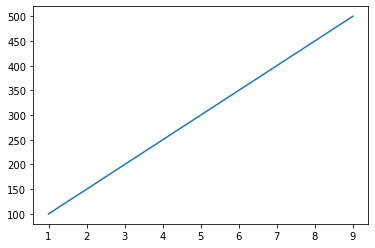

In [22]:
# 기본 그래프
x = [1,3,5,7,9]
y = [100, 200, 300, 400, 500]
plt.plot(x, y)

len(x): 128


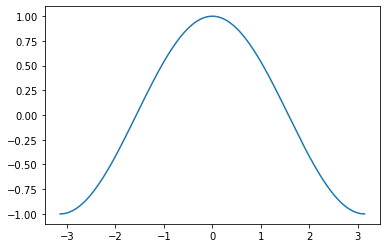

In [26]:
# cosine 함수
x = np.linspace( - np.pi, np.pi, 128) # 연속적인 값을 갖는 배열
print('len(x):',len(x))
y = np.cos(x) # x 리스트에 대한 cos 값 계산
plt.plot(x,y)

<AxesSubplot:>

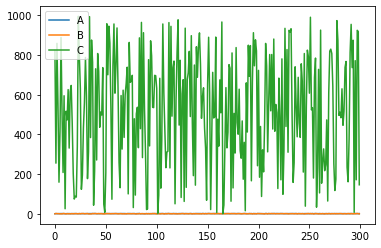

In [28]:
# 판다스 데이터 시각화
import pandas as pd
data_frame = pd.read_csv('./data_in/datafile.csv')
data_frame.plot()

<AxesSubplot:>

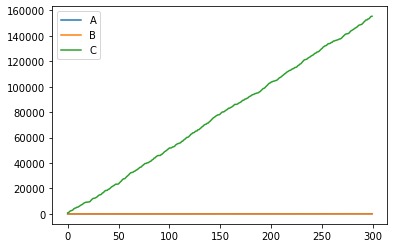

In [29]:
data_sum = data_frame.cumsum() # 데이터를 누적값으로 바꿔준다
data_sum.plot()

In [30]:
# 정규표현식 re

import re

In [31]:
pattern = '\W+'
re_pattern = re.compile(pattern)

In [33]:
re.search("(\w+)", "wow, it is awesome")

<re.Match object; span=(0, 3), match='wow'>


In [34]:
re.split('\W', 'wow, it is world of word') # comma와 it 앞 공백 사이에 ''가 나온 것! comma도 구분 기준이라,,

['wow', '', 'it', 'is', 'world', 'of', 'word']

In [35]:
re.sub('\d', 'number', '7 candy')

'number candy'

In [36]:
# Beautiful Soup _ 웹 크롤링에 사용되는 라이브러리
# html xml 문서에서 데이터 불러오는 데에 사용됨. 이 책에서는 주로 html 태그 제거하는 데에 쓰임
!pip install html5lib

  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)


In [1]:
from bs4 import BeautifulSoup

In [2]:
string = '<body> 이 글은 Beautiful soup 라이브러리를 사용하는 방법에 대한 글입니다. <br> </br> 라이브러리를 사용하면 쉽게 HTML 태그를 제거할 수 있습니다.</body>'
string = BeautifulSoup(string, "html5lib").get_text() # html 태그 제외한 텍스트만 가져오겠다
print(string)

 이 글은 Beautiful soup 라이브러리를 사용하는 방법에 대한 글입니다.   라이브러리를 사용하면 쉽게 HTML 태그를 제거할 수 있습니다.


In [3]:
## Kaggle
!pip install kaggle

  Using cached kaggle-1.5.12.tar.gz (58 kB)
  Using cached tqdm-4.59.0-py2.py3-none-any.whl (74 kB)
  Using cached python-slugify-4.0.1.tar.gz (11 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73053 sha256=96593137eb6fb6caa88b1fe17ef1881c5cd904b6691f691c36c1a4bdb23e8200
  Stored in directory: c:\users\gpwl0\appdata\local\pip\cache\wheels\ac\b2\c3\fa4706d469b5879105991d1c8be9a3c2ef329ba9fe2ce5085e
  Created wheel for python-slugify: filename=python_slugify-4.0.1-py2.py3-none-any.whl size=6769 sha256=bdc9b6f6feb2fdfafcab3f6726ed87d3b1b1f0292ce533aa5a3f22e6d5697491
  Stored in directory: c:\users\gpwl0\appdata\local\pip\cache\wheels\84\5b\00\3ebff44b1e0a380d959960828803a9486ff2433728cceff666
Successfully built kaggle python-slugify


In [ ]:
kaggle competitions download -c HomeCreditDefaultRisk